Лабораторная работа №1

In [26]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import KMeans
from collections import Counter

Загрузка данных

In [19]:
df = pd.read_csv('dataset.csv')
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


Подготовка данных

In [20]:
# Удаление размеченной переменной - Quality

df = df.drop(columns=['Quality (1-5)'])

In [10]:
# Color

colors = set(df['Color'])

colorsDict = {item:val for val, item in enumerate(colors)}

colorsDict

{'Light Orange': 0,
 'Deep Orange': 1,
 'Orange-Red': 2,
 'Yellow-Orange': 3,
 'Orange': 4}

In [11]:
# Variety

varieties = set(df['Variety'])

varietiesDict = {item:val for val, item in enumerate(varieties)}

varietiesDict

{'Star Ruby': 0,
 'Valencia': 1,
 'Murcott (Hybrid)': 2,
 'Honey Tangerine': 3,
 'Moro (Blood)': 4,
 'Satsuma Mandarin': 5,
 'Clementine': 6,
 'Temple': 7,
 'Clementine (Seedless)': 8,
 'Washington Navel': 9,
 'Navel (Late Season)': 10,
 'Jaffa': 11,
 'Ambiance': 12,
 'Hamlin': 13,
 'Ortanique (Hybrid)': 14,
 'Tangerine': 15,
 'Cara Cara': 16,
 'Tangelo (Hybrid)': 17,
 'California Valencia': 18,
 'Midsweet (Hybrid)': 19,
 'Blood Orange': 20,
 'Navel (Early Season)': 21,
 'Navel': 22,
 'Minneola (Hybrid)': 23}

In [12]:
# Blemishes 

blemishesDict = {'N': 0, 'Y': 1}

blemishesDict

{'N': 0, 'Y': 1}

In [21]:
df['Color'] = df['Color'].map(lambda elem: colorsDict[elem])
df['Variety'] = df['Variety'].map(lambda elem: varietiesDict[elem])
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].map(lambda elem: blemishesDict[elem[0]])

In [14]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
0,7.5,180,12.0,3.2,2.0,10,4.0,4,1,0
1,8.2,220,10.5,3.4,3.0,14,4.5,1,22,0
2,6.8,150,14.0,3.0,1.0,7,5.0,0,16,0
3,9.0,250,8.5,3.8,4.0,21,3.5,2,20,0
4,8.5,210,11.5,3.3,2.5,12,5.0,4,13,1
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,2,15,1
237,7.4,275,8.5,3.5,5.0,20,5.0,0,23,0
238,7.5,196,15.7,3.0,3.0,13,3.0,1,7,1
239,7.2,251,9.8,4.3,3.0,23,1.0,0,4,1


k-means

In [22]:
df = pd.DataFrame(data=StandardScaler().fit_transform(df), columns=df.columns)


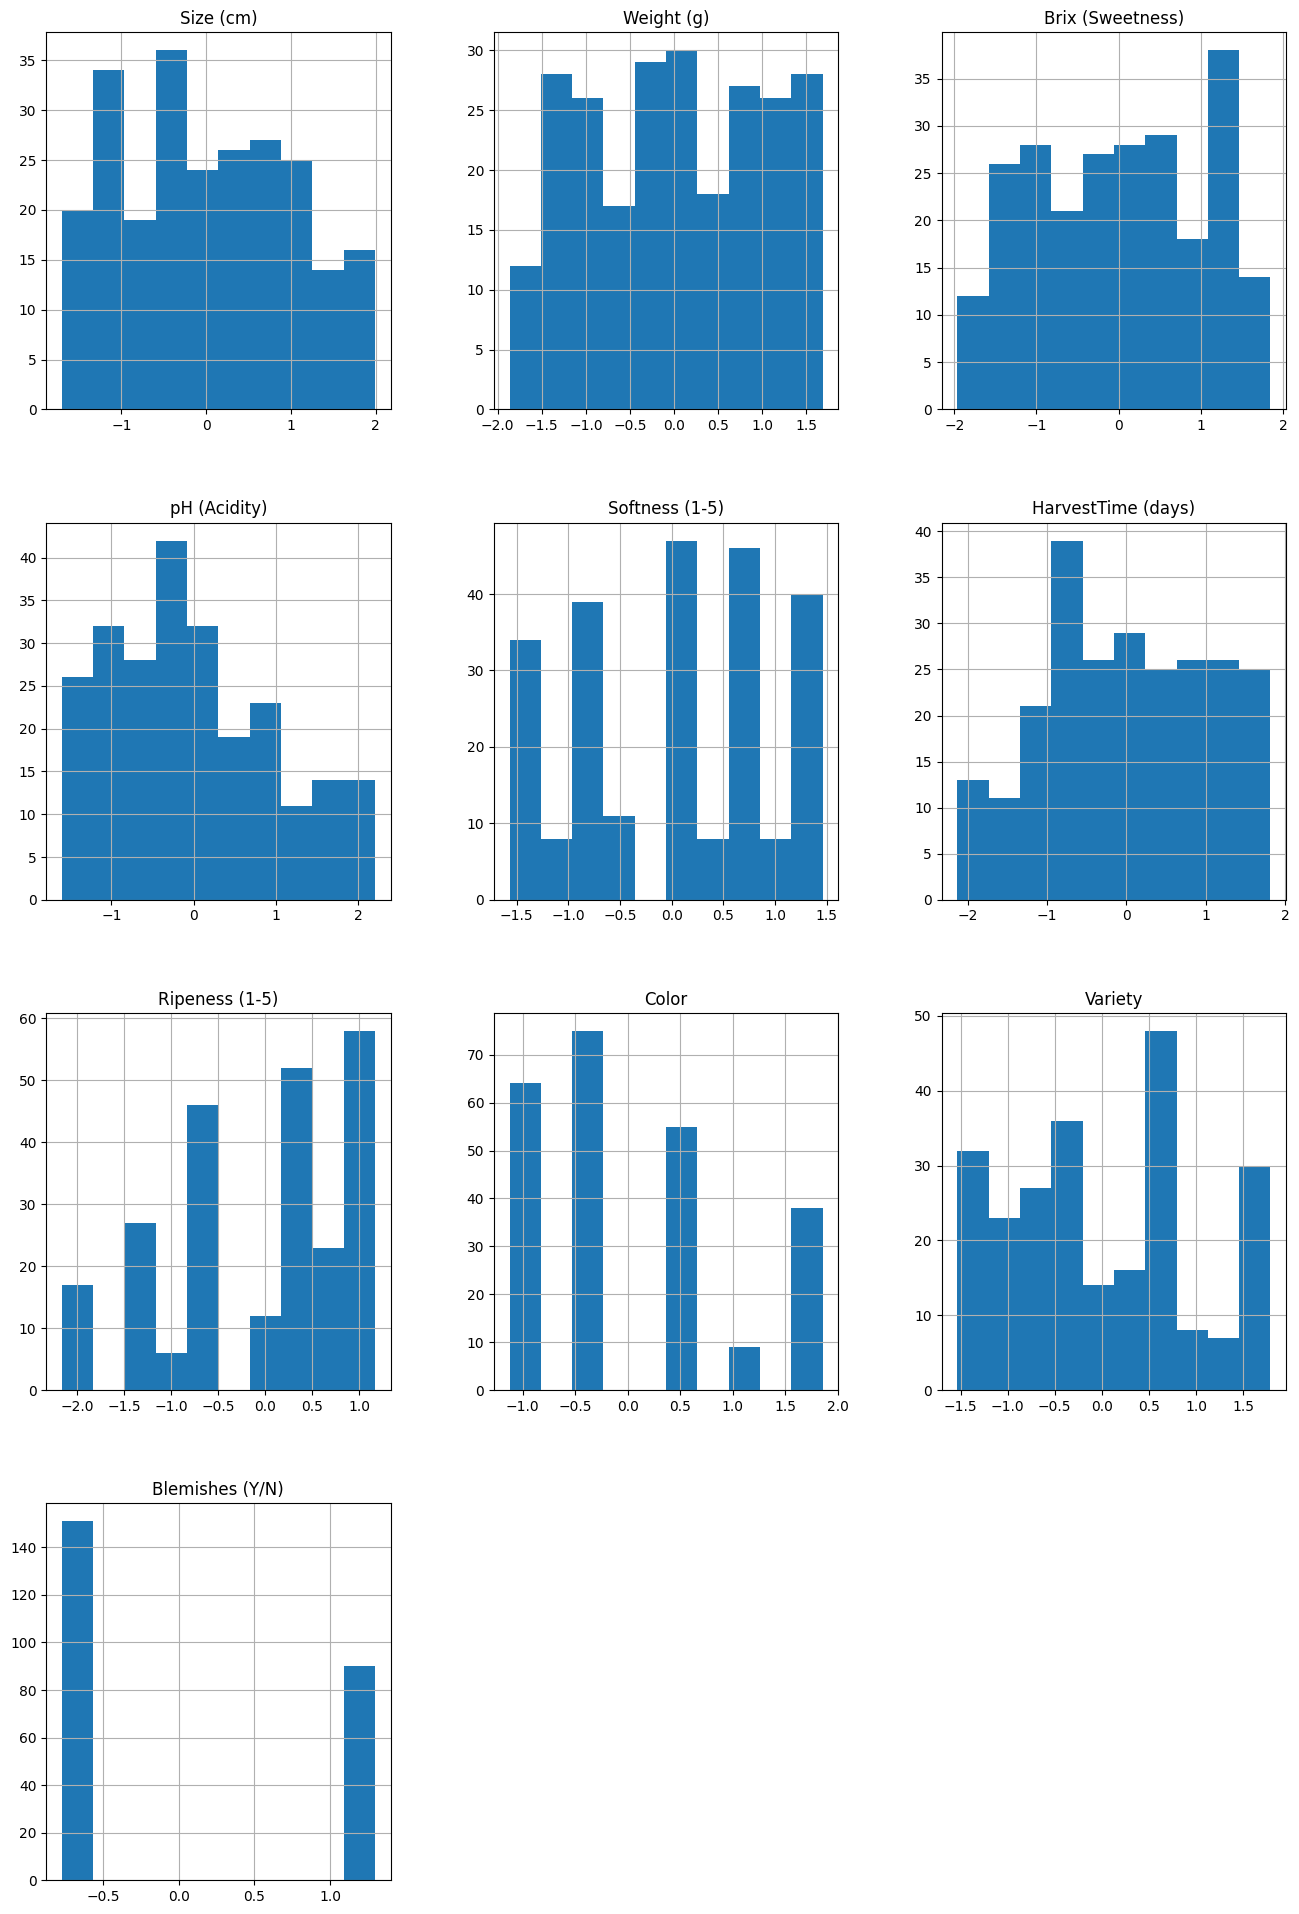

In [25]:
df.hist(bins=10, figsize=(16, 24), grid=True)
plt.show()

9

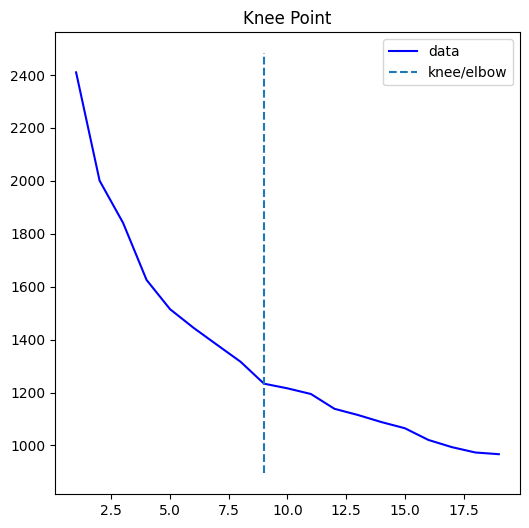

In [30]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

kneedle = KneeLocator(K, distortions, curve = "convex", direction="decreasing")

n_clusters = kneedle.knee
display(n_clusters)
kneedle.plot_knee()

In [33]:
kmeanModel = KMeans(n_clusters=9)
kmeanModel = kmeanModel.fit_predict(df)

Counter(kmeanModel)

Counter({5: 43, 2: 36, 4: 38, 1: 48, 3: 38, 0: 38})